In [1]:
import pandas as pd
bank_df = pd.read_csv( 'bank.csv' ) 
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [2]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [7]:
bank_df['subscribed'].value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

    The dataset has a total of 4521 observations, out of which 521 customers subscribed the term deposit (approximately 11.5%) and the remaining 4000 did not subscribe the term deposit. 

In [3]:
X_features = list( bank_df.columns )
X_features.remove( 'subscribed' )
X_features 

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [8]:
encoded_bank_df = pd.get_dummies( bank_df[X_features], drop_first = True )

In [9]:
Y = bank_df.subscribed.map( lambda x: int( x == 'yes') )
X = encoded_bank_df 

In [12]:
X.head()

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [15]:
Y[:5]

0    0
1    0
2    0
3    0
4    0
Name: subscribed, dtype: int64

#### Building the Logistic Regression Model


In [19]:
import statsmodels.api as sm

logit_model = sm.Logit( Y, sm.add_constant( X ) ).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


H:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   subscribed       AIC:              3082.2384 
Date:                 2020-06-24 13:30 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

    Significant variables are,

In [22]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [24]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

    Setting X_features to only significant variables and building a logistic regression model with the significant features.

In [25]:
X_features = ['current-campaign', 
              'previous-campaign',  
              'job_retired',  
              'marital_married',  
              'education_tertiary', 
              'housing-loan_yes',  
              'personal-loan_yes']

In [26]:
logit_model_2 = sm.Logit( Y, sm.add_constant( X[X_features] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


In [27]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.056     
Dependent Variable:   subscribed       AIC:              3065.2182 
Date:                 2020-06-24 13:53 BIC:              3116.5501 
No. Observations:     4521             Log-Likelihood:   -1524.6   
Df Model:             7                LL-Null:          -1615.5   
Df Residuals:         4513             LLR p-value:      8.1892e-36
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
current-campaign   -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous-campaign   0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing-loan_yes   -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
personal-loan_yes  -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

    p_value for LLR shows that the overall model is significant. We will predict the probablities of the same observations as we have not split the dataset.  

In [28]:
y_pred_df = pd.DataFrame( { 'actual': Y, 'predicted_prob': logit_model_2.predict( sm.add_constant( X[X_features] ) ) } ) 

In [29]:
sorted_predict_df = y_pred_df[['predicted_prob', 'actual']].sort_values( 'predicted_prob', ascending = False )

    After sorting, we will segment all the observations into deciles. First we will find the number of observations in each decile by dividing the total number of observations by 10.

In [30]:
num_per_decile = int( len( sorted_predict_df ) / 10 ) 
print( "Number of observations per decile: ", num_per_decile) 

Number of observations per decile:  452


In [33]:
def get_deciles( df ): 
    df['decile'] = 1
    idx = 0   
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    df['decile'] = df['decile'] + 1 
    return df

In [34]:
deciles_predict_df = get_deciles( sorted_predict_df ) 

In [35]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


In [37]:
deciles_predict_df[453:465]

,predicted_prob,actual,decile
465,0.201972,0,2
1731,0.200232,0,2
3201,0.200232,0,2
3486,0.200232,0,2
1018,0.200232,0,2
1393,0.200232,0,2
2209,0.200232,0,2
743,0.200232,1,2
2491,0.200232,0,2
1721,0.200232,0,2


### Gain and Lift Charts

    Gain and Lift Charts are two measures that measures the benefits of using Logistic Regression model. In target marketing or marketing campaigns, customers responses to campaign are usually very low (in many cases the customer who respond to marketing compaigns are less than 1%). Another example of such low conversion is response to advertisement on the Interet(Google Adsense). The organization incurs cost for each customer contact and hence would be like to minimize the cost of marketing compaign and at the same time achieve the desired response level from the customers. 
    
    The Gain and Lift Charts are useful and obtained from below steps:
    
        1. Predict the probabilities of positive (Y = 1) using LR model and arrange the observation in the decreasing order of predicted probability. 
        2. Divide the datasets into deciles. Calculate the number of positives (Y = 1) in each decile and cummulative number of positives upto a decile.
        3. Gain is the ratio between cumulative number of positive observations upto a decile to total number of positive observations in the data. Gain Chart is a Chart drawn between Gain on the vertical axis and decile on the horizontal axis.
        4. Lift is the ratio of the number of positive observations upt to decile i using the LR model to the expected number of positives up to that decile i based on a random model. Lift chart is the chart between lift on the vertical axis and the corresponding decile on the horizontal axis.

    To calculate the Gain, we need to find how many subscriptions (how many 1's) are available in each decile. 

In [38]:
gain_lift_df = pd.DataFrame( deciles_predict_df.groupby( 'decile')['actual'].sum() ).reset_index() 
gain_lift_df.columns = ['decile', 'gain']

In [42]:
gain_lift_df.gain.cumsum()

0    125
1    208
2    281
3    334
4    365
5    411
6    448
7    476
8    501
9    521
Name: gain, dtype: int64

In [43]:
gain_lift_df.gain.sum()

521

    And then the cumulative sum for each subsequent decile divided by total number of 1's available will give Gain Percentage.

In [39]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [40]:
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


In [44]:
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

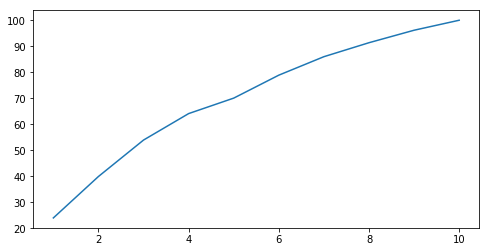

In [45]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'], gain_lift_df['gain_percentage'], '-' ) 
plt.show() 

#### Calculating Lift

    Lift chart can be calculated by dividing gain percentage by the decile number
    
        

In [46]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage / ( gain_lift_df.decile * 10) ) 

In [47]:
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


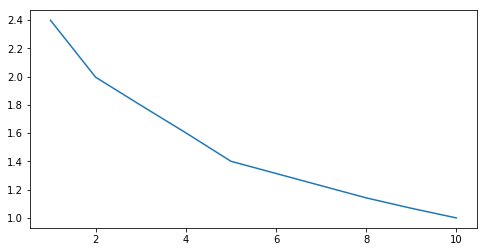

In [48]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'], gain_lift_df['lift'], '-' ) 
plt.show()

    Targeting customer using the model can capture 2.39 times the number of subscribers compared to a random model in decile 1, 1.99 times up to decile 2 and so on. 

    The lift chart shows how much more likely we are to receive positive responses than if we contact a random sample of customers. For example, by contacting only 10% of customers based on the predictive model we will reach 2.5 times as many respondents, as if we use no model.